In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt'
names = ['variance_wavelet','skewness_wavelet','curtosis_wavelet','entropy_image','class']
df = pd.read_csv(url, names=names)

In [3]:
df.head()

,variance_wavelet,skewness_wavelet,curtosis_wavelet,entropy_image,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [4]:
df.describe()

,variance_wavelet,skewness_wavelet,curtosis_wavelet,entropy_image,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


data seems to be pretty balanced, class=0 is for real notes, class=1 is for fake notes

In [6]:
Y = df['class']
X = df.drop("class",axis =1)

Text(0.5, 1.0, 'Class Histogram')

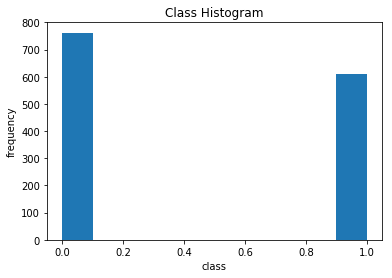

In [7]:
plt.hist(Y)
plt.xlabel('class')
plt.ylabel('frequency')
plt.title('Class Histogram')

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0) 

In [9]:
sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test) 

In [10]:
knn = KNeighborsClassifier(n_neighbors=3)  
knn.fit(X_train, Y_train) 
probs = knn.predict_proba(X_test)
probs = probs[:, 1]

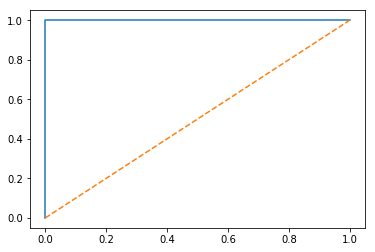

In [11]:
auc = roc_auc_score(Y_test, probs)
fpr, tpr, thresholds = roc_curve(Y_test, probs)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')

In [12]:
print("AUC:",auc)

AUC: 1.0


In [13]:
print("Model Accuracy:",knn.score(X_test,Y_test))

Model Accuracy: 1.0


knn model has a 100% success rate on testing data with an ROC of AUC of 1